In [22]:
import sys

import pandas as pd
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#% matplotlib inline
from datetime import datetime
import datefinder

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')

import string
import gensim
import collections
from gensim.corpora import Dictionary

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

from autocorrect import Speller
import tldextract

from bs4 import BeautifulSoup
import requests
import csv
import time

import string
import gc
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx
from itertools import chain

import matplotlib as mpl
from pylab import rcParams

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sentence_transformers import SentenceTransformer
import hdbscan
import matplotlib.pyplot as plt

import umap

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Merging the collected json files from SerpAPI

##### Make a list of the files

In [23]:
# First listing out the names of all json files into a list
# as per the range of data files (related to page numbers)

files= []
string1 = 'serp_data/2012-2017/search_results_' # 2012-2017
string2 = '.json'

string3 = 'serp_data/2018-2019/search_results_' #2018-2019
string4 = 'serp_data/2020/search_results_'      #2020
string5 = 'serp_data/2021/search_results_'      #2021
string6 = 'serp_data/2022/search_results_'      #2022


for i in range(46):  # 2012-2017
    files.append(string1 + str(i) + string2)
    
for i in range(45):  #2018-2019
    files.append(string3 + str(i) + string2)
    
for i in range(30):  #2020
    files.append(string4 + str(i) + string2)
    
for i in range(48):  #2021
    files.append(string5 + str(i) + string2)
    
for i in range(35):  #2022
    files.append(string6 + str(i) + string2)    

##### Read and add them to a single pandas dataframe

In [24]:
# Create an empty dataframe and add the values from each json file of the list from it

data = pd.DataFrame()

for lst in files:
    with open(lst, 'r') as f:
        data_temp = json.load(f)
    data_temp = pd.json_normalize(data_temp, record_path =['organic_results'])
    data = pd.concat([data, data_temp], axis=0)  

In [25]:
data['index'] = range(1, len(data) + 1)
data

,position,title,result_id,type,link,snippet,resources,publication_info.summary,publication_info.authors,inline_links.serpapi_cite_link,...,inline_links.cited_by.serpapi_scholar_link,inline_links.related_pages_link,inline_links.serpapi_related_pages_link,inline_links.versions.total,inline_links.versions.link,inline_links.versions.cluster_id,inline_links.versions.serpapi_scholar_link,inline_links.cached_page_link,inline_links.html_version,index
0,0,Hateful symbols or hateful people? predictive ...,eG51Yln4CGsJ,Pdf,https://aclanthology.org/N16-2013.pdf,"… , NLP research on hate speech has been very ...","[{'title': 'aclanthology.org', 'file_format': ...","Z Waseem, D Hovy - Proceedings of the NAACL st...","[{'name': 'D Hovy', 'link': 'https://scholar.g...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:e...,https://serpapi.com/search.json?as_sdt=0%2C21&...,7.0,https://scholar.google.com/scholar?cluster=771...,7712687424659615352,https://serpapi.com/search.json?as_sdt=0%2C21&...,https://scholar.googleusercontent.com/scholar?...,NaN,1
1,1,The Bullying Game: Sexism Based Toxic Language...,m6JOssuaA8UJ,NaN,https://search.proquest.com/openview/7e6d1aa29...,"… Based on this classification method, the mac...",NaN,"A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - C...","[{'name': 'N Yıldırım', 'link': 'https://schol...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,Mean birds: Detecting aggression and bullying ...,nmwGhySbXz4J,NaN,https://dl.acm.org/doi/abs/10.1145/3091478.309...,… [36] perform hate speech detection on Yahoo ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:n...,https://serpapi.com/search.json?as_sdt=0%2C21&...,18.0,https://scholar.google.com/scholar?cluster=449...,4494481534325517470,https://serpapi.com/search.json?as_sdt=0%2C21&...,NaN,NaN,3
3,3,Hate is not binary: Studying abusive behavior ...,T3zAicbzZDkJ,NaN,https://dl.acm.org/doi/abs/10.1145/3078714.307...,… We perform an unsupervised machine learning ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:T...,https://serpapi.com/search.json?as_sdt=0%2C21&...,17.0,https://scholar.google.com/scholar?cluster=413...,4135698391873125455,https://serpapi.com/search.json?as_sdt=0%2C21&...,NaN,NaN,4
4,4,"On the Detection of Hate Speech, Hate Speakers...",qKtEpwXk55wJ,NaN,https://search.proquest.com/openview/395ac461a...,… of machine learning algorithms in understand...,"[{'title': 'cornell.edu', 'file_format': 'PDF'...",D Warmsley - 2017 - search.proquest.com,"[{'name': 'D Warmsley', 'link': 'https://schol...",https://serpapi.com/search.json?engine=google_...,...,https://serpapi.com/search.json?as_sdt=2000000...,https://scholar.google.com/scholar?q=related:q...,https://serpapi.com/search.json?as_sdt=0%2C21&...,2.0,https://scholar.google.com/scholar?cluster=113...,11306256102469184424,https://serpapi.com/search.json?as_sdt=0%2C21&...,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14,Peer Support IDD Scoping Review Search,vHK6O-kNJ9EJ,NaN,https://scholarshare.temple.edu/handle/20.500....,To identify studies to include or consider for...,"[{'title': 'temple.edu', 'file_format': 'HTML'...","S Roth, B Pfeiffer, KE Weiss, S Aleong, L Karp...","[{'name': 'S Roth', 'link': 'https://scholar.g...",https://serpapi.com/search.json?engine=

In [26]:
data['index'].unique() # no. of results

array([   1,    2,    3, ..., 4027, 4028, 4029])

In [27]:
data.columns

Index(['position', 'title', 'result_id', 'type', 'link', 'snippet',
       'resources', 'publication_info.summary', 'publication_info.authors',
       'inline_links.serpapi_cite_link', 'inline_links.cited_by.total',
       'inline_links.cited_by.link', 'inline_links.cited_by.cites_id',
       'inline_links.cited_by.serpapi_scholar_link',
       'inline_links.related_pages_link',
       'inline_links.serpapi_related_pages_link',
       'inline_links.versions.total', 'inline_links.versions.link',
       'inline_links.versions.cluster_id',
       'inline_links.versions.serpapi_scholar_link',
       'inline_links.cached_page_link', 'inline_links.html_version', 'index'],
      dtype='object')

In [28]:
data['resources'].isna().sum() # A lot of missing values, so cannot use that

1569

In [29]:
data['publication_info.summary']

0     Z Waseem, D Hovy - Proceedings of the NAACL st...
1     A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - C...
2     D Chatzakou, N Kourtellis, J Blackburn… - Proc...
3     D Chatzakou, N Kourtellis, J Blackburn… - Proc...
4               D Warmsley - 2017 - search.proquest.com
                            ...                        
14    S Roth, B Pfeiffer, KE Weiss, S Aleong, L Karp...
15    A Thomson, S Ganz - Margaret Atwood Studies, 2...
16    V Ceia, B Nothwehr, L Wagner - webassets.oxfam...
17                 S Behan - 2022 - search.proquest.com
18                  C CHUN - 2022 - search.proquest.com
Name: publication_info.summary, Length: 4029, dtype: object

In [30]:
def substring_after(s, delim):
    return s.partition(delim)[2]

#def substring_before(s, delim):
#    return s.partition(delim)[0]

def substring_before_date(s):
    #date = re.search(r"\d{4}", s).group(0)
    date = re.findall('(\d{4})', s)
    if bool(date): # checks if the list is empty or not
        if date[0] in s:
            value = s.partition(date[0])[0]
        elif s.startswith(date[0]):
            value = ''
    else:
        value = ''
    return value

In [31]:
data['extracted_public_inf'] = data['publication_info.summary'].apply(lambda x: substring_after(x, '-'))

## Observations:
# Multiple publications leading to the same website

#data['extracted_public_inf'][2], data['extracted_public_inf'][3]

In [32]:
test = data['extracted_public_inf'].iloc[8]
print(substring_before_date(test))

 Minn. L. Rev., 


In [138]:
data.index = data['index']
# drop the index column
data = data.drop(columns='index')
data['extracted_public_inf']

index
1       Proceedings of the NAACL student research …
2                            Conference on Gender …
3                              Proceedings of the …
4                         Proceedings of the 28th …
5                                                  
                           ...                     
4025                                               
4026                        Margaret Atwood Studies
4027                                               
4028                                               
4029                                               
Name: extracted_public_inf, Length: 4029, dtype: object

In [34]:
data['extracted_public_inf'] = data['extracted_public_inf'].apply(lambda x: substring_before_date(x))
data['extracted_public_inf']

index
1        Proceedings of the NAACL student research …, 
2                             Conference on Gender …, 
3                               Proceedings of the …, 
4                          Proceedings of the 28th …, 
5                                                     
                             ...                      
4025                                                  
4026                         Margaret Atwood Studies, 
4027                                                  
4028                                                  
4029                                                  
Name: extracted_public_inf, Length: 4029, dtype: object

In [35]:
# to remove whitespace and characters from the beginning and the end of a string\n",
data['extracted_public_inf'] = data['extracted_public_inf'].str.strip()

# Apply a function to clean the data and remove the unnecessary characters
def clean_text(x):
    text = x.replace(r',', '') 
    #text = text.replace(r'...', '') 
    text = text.lstrip('./')
    return text

data['extracted_public_inf'] = data['extracted_public_inf'].apply(clean_text)

### Understanding the data

In [36]:
data['resources'] ## can see where from we get the data

index
1       [{'title': 'aclanthology.org', 'file_format': ...
2                                                     NaN
3       [{'title': 'arxiv.org', 'file_format': 'PDF', ...
4       [{'title': 'arxiv.org', 'file_format': 'PDF', ...
5       [{'title': 'cornell.edu', 'file_format': 'PDF'...
                              ...                        
4025    [{'title': 'temple.edu', 'file_format': 'HTML'...
4026                                                  NaN
4027    [{'title': 'oxfamamerica.org', 'file_format': ...
4028                                                  NaN
4029                                                  NaN
Name: resources, Length: 4029, dtype: object

In [50]:
# Get the source page titles from the nested json
sources = pd.json_normalize(data['resources'])
nested_sources = pd.json_normalize(sources[0])
data['source_title']= nested_sources['title']
data['source_title']

index
1                    NaN
2              arxiv.org
3              arxiv.org
4            cornell.edu
5               unisa.it
              ...       
4025                 NaN
4026    oxfamamerica.org
4027                 NaN
4028                 NaN
4029                 NaN
Name: source_title, Length: 4029, dtype: object

In [41]:
data['source_title'].isna().sum() # a lot of nan values

1570

In [67]:
most_sources_df = data['source_title'].value_counts()[:20].reset_index(name='counts').rename(columns={'index':'websites'})
most_sources_df.head(10)

,websites,counts
0,arxiv.org,187
1,researchgate.net,172
2,tandfonline.com,118
3,academia.edu,88
4,aclanthology.org,49
5,mdpi.com,39
6,springer.com,37
7,nih.gov,34
8,core.ac.uk,34
9,sagepub.com,30


In [68]:
# Function to extract only the domain name from the url

def extr_url_dom(x):
    ext = tldextract.extract(x)
    return ext.domain


most_sources_df['domains'] = most_sources_df['websites'].apply(lambda x: extr_url_dom(x))

In [69]:
most_sources_df.domains.tolist()

['arxiv',
 'researchgate',
 'tandfonline',
 'academia',
 'aclanthology',
 'mdpi',
 'springer',
 'nih',
 'core',
 'sagepub',
 'ceur-ws',
 'proquest',
 'oapen',
 'archive',
 'escholarship',
 'siu',
 'mit',
 'diva-portal',
 'colby',
 'acm']

#### Create a dictionary from the data we get above

In [71]:
dict_domains = {
    'arxiv': 'arXiv',
    'researchgate': 'ResearchGate',
    'tandfonline': 'Taylor & Francis',
    'academia': 'Academia.edu',
    'aclanthology': 'ACL Anthology',
    'mdpi': 'MDPI',
    'springer': 'Springer',
    'nih': 'National Institutes of Health',
    'core': 'CORE',
    'sagepub': 'SAGE Publications Ltd',
    'ceur-ws': 'CEUR Workshop Proceedings',
    'proquest': 'ProQuest LLC',
    'oapen': 'OAPEN',
    'archive': 'Internet Archive',
    'escholarship': 'eScholarship Publishing',
    'siu': 'Southern Illinois University',
    'mit': 'Massachusetts Institute of Technology',
    'diva-portal': 'DiVA portal',
    'colby': 'Colby',
    'acm': 'Association for Computing Machinery'
}

It's easier to just create a column instead of dictionary. But creating a dictionary and mapping it is more efficient.

#### Mapping the dictionary

In [72]:
most_sources_df['domain_names'] = most_sources_df['domains'].map(dict_domains)
most_sources_df

,websites,counts,domains,domain_names
0,arxiv.org,187,arxiv,arXiv
1,researchgate.net,172,researchgate,ResearchGate
2,tandfonline.com,118,tandfonline,Taylor & Francis
3,academia.edu,88,academia,Academia.edu
4,aclanthology.org,49,aclanthology,ACL Anthology
5,mdpi.com,39,mdpi,MDPI
6,springer.com,37,springer,Springer
7,nih.gov,34,nih,National Institutes of Health
8,core.ac.uk,34,core,CORE
9,sagepub.com,30,sagepub,SAGE Publications Ltd


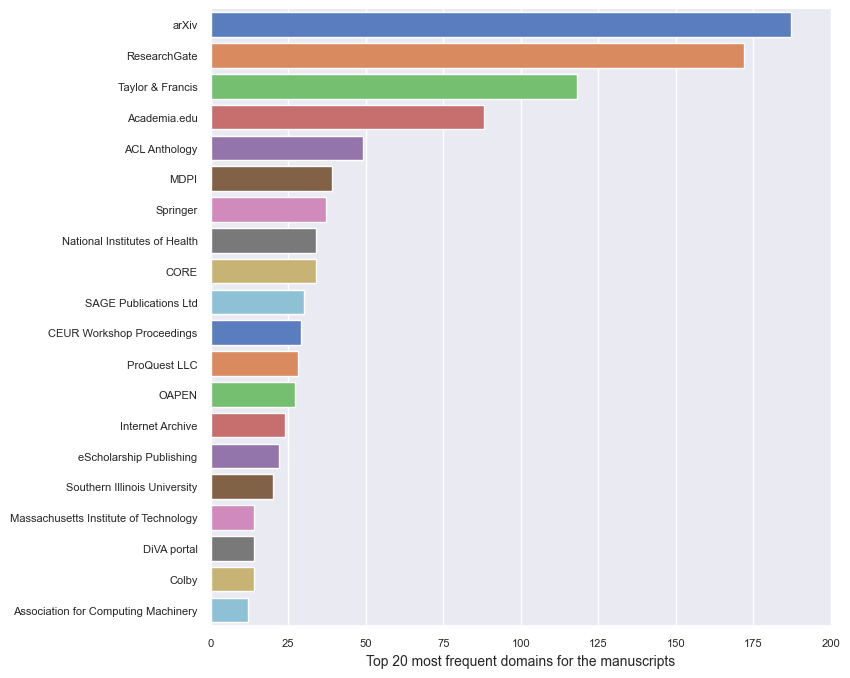

In [127]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
palette = sns.color_palette("muted")
p = sns.barplot(x="counts", y="domain_names", data=most_sources_df,
            label="counts", palette=palette)
ax.set(xlim=(0, 200))
sns.despine(left=True, bottom=True)
p.set_xlabel("Top 20 most frequent domains for the manuscripts", fontsize=10)
p.set_ylabel("",fontsize=10)
p.tick_params(labelsize=8)


## Co-authorship network

In [129]:
data['publication_info.summary'].values

array(['Z Waseem, D Hovy - Proceedings of the NAACL student research …, 2016 - aclanthology.org',
       'A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - Conference on Gender …, 2014 - search.proquest.com',
       'D Chatzakou, N Kourtellis, J Blackburn… - Proceedings of the …, 2017 - dl.acm.org',
       ..., 'V Ceia, B Nothwehr, L Wagner - webassets.oxfamamerica.org',
       'S Behan - 2022 - search.proquest.com',
       'C CHUN - 2022 - search.proquest.com'], dtype=object)

In [130]:
data['publication_info.authors']

index
1       [{'name': 'D Hovy', 'link': 'https://scholar.g...
2       [{'name': 'N Yıldırım', 'link': 'https://schol...
3       [{'name': 'D Chatzakou', 'link': 'https://scho...
4       [{'name': 'D Chatzakou', 'link': 'https://scho...
5       [{'name': 'D Warmsley', 'link': 'https://schol...
                              ...                        
4025    [{'name': 'S Roth', 'link': 'https://scholar.g...
4026    [{'name': 'A Thomson', 'link': 'https://schola...
4027    [{'name': 'V Ceia', 'link': 'https://scholar.g...
4028                                                  NaN
4029                                                  NaN
Name: publication_info.authors, Length: 4029, dtype: object

In [131]:
authors = pd.json_normalize(data['publication_info.authors'])
nested_authors1 = pd.json_normalize(authors[0])
nested_authors1['index'] = range(1, len(nested_authors1) + 1)
nested_authors1.columns

#nested_authors1['name'].isna().sum() #1848 
#len(nested_authors1.dropna()) #2181

Index(['name', 'link', 'serpapi_scholar_link', 'author_id', 'index'], dtype='object')

In [132]:
nested_authors1['index'].unique()

array([   1,    2,    3, ..., 4027, 4028, 4029])

In [133]:
nested_authors2 =  pd.json_normalize(authors[1])
nested_authors2['index'] = range(1, len(nested_authors2) + 1)
nested_authors3 = pd.json_normalize(authors[2])
nested_authors3['index'] = range(1, len(nested_authors3) + 1)

# Do a lot of them have second and third authors?
#len(nested_authors3['name'].unique())  #404
#len(nested_authors2['name'].unique()) #923

In [134]:
nested_authors4 = pd.json_normalize(authors[3]) #110
nested_authors4['index'] = range(1, len(nested_authors4) + 1)
nested_authors5 = pd.json_normalize(authors[4]) #15
nested_authors5['index'] = range(1, len(nested_authors5) + 1)
len(nested_authors5['name'].unique()) 

15

##### Building the network

In [135]:
# Getting only the first authors could be interesting
#data = data.merge(nested_authors1,how='left',on='index')
#data['first_authors_id'] = nested_authors1['author_id']
#len(data['first_authors'].unique())
#len(data['author_id'].unique())

#data['author_id']
#data.columns

In [140]:
# Merge the two dataframes

#only run once
data = pd.merge(data, nested_authors1, on="index", how="left")
data = data.rename(columns={"name": "author_name_1", "author_id": "author_id_1"})

In [141]:
data = pd.merge(data, nested_authors2, on="index", how="left")
data = data.rename(columns={"name": "author_name_2", "author_id": "author_id_2"})
data = pd.merge(data, nested_authors3, on="index", how="left").rename(columns={"name": "author_name_3", "author_id": "author_id_3"})
data = pd.merge(data, nested_authors4, on="index", how="left").rename(columns={"name": "author_name_4", "author_id": "author_id_4"})
data = pd.merge(data, nested_authors5, on="index", how="left").rename(columns={"name": "author_name_5", "author_id": "author_id_5"})

#data = pd.merge(data, nested_authors4, on="index", how="left")
#data = pd.merge(data, nested_authors4, on="index", how="left")

In [142]:
# Check to see if the columns are reflected in the dataframe
data.columns

Index(['index', 'position', 'title', 'result_id', 'type', 'link_x', 'snippet',
       'resources', 'publication_info.summary', 'publication_info.authors',
       'inline_links.serpapi_cite_link', 'inline_links.cited_by.total',
       'inline_links.cited_by.link', 'inline_links.cited_by.cites_id',
       'inline_links.cited_by.serpapi_scholar_link',
       'inline_links.related_pages_link',
       'inline_links.serpapi_related_pages_link',
       'inline_links.versions.total', 'inline_links.versions.link',
       'inline_links.versions.cluster_id',
       'inline_links.versions.serpapi_scholar_link',
       'inline_links.cached_page_link', 'inline_links.html_version',
       'extracted_public_inf', 'source_title', 'author_name_1', 'link_y',
       'serpapi_scholar_link_x', 'author_id_1', 'author_name_2', 'link_x',
       'serpapi_scholar_link_y', 'author_id_2', 'author_name_3', 'link_y',
       'serpapi_scholar_link_x', 'author_id_3', 'author_name_4', 'link_x',
       'serpapi_scholar_l

In [143]:
len(data['author_name_1'].unique()) #1963 

1963

In [144]:
# take a subset of the data which has values for the 'author_name_1' column
# only 1st author taken into consideration here because of their name HAS to be there

data_auth = data.dropna(subset=['author_name_1']) # to drop the rows which do not have the names of first authors
data_auth

,index,position,title,result_id,type,link_x,snippet,resources,publication_info.summary,publication_info.authors,...,serpapi_scholar_link_x,author_id_3,author_name_4,link_x,serpapi_scholar_link_y,author_id_4,author_name_5,link_y,serpapi_scholar_link,author_id_5
0,1,0,Hateful symbols or hateful people? predictive ...,eG51Yln4CGsJ,Pdf,https://aclanthology.org/N16-2013.pdf,"… , NLP research on hate speech has been very ...","[{'title': 'aclanthology.org', 'file_format': ...","Z Waseem, D Hovy - Proceedings of the NAACL st...","[{'name': 'D Hovy', 'link': 'https://scholar.g...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,The Bullying Game: Sexism Based Toxic Language...,m6JOssuaA8UJ,NaN,https://search.proquest.com/openview/7e6d1aa29...,"… Based on this classification method, the mac...",NaN,"A Ekiciler, İ Ahioğlu, N Yıldırım, İ Ajas… - C...","[{'name': 'N Yıldırım', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,Mean birds: Detecting aggression and bullying ...,nmwGhySbXz4J,NaN,https://dl.acm.org/doi/abs/10.1145/3091478.309...,… [36] perform hate speech detection on Yahoo ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,https://serpapi.com/search.json?author_id=W_Ap...,W_ApnIUAAAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3,Hate is not binary: Studying abusive behavior ...,T3zAicbzZDkJ,NaN,https://dl.acm.org/doi/abs/10.1145/3078714.307...,… We perform an unsupervised machine learning ...,"[{'title': 'arxiv.org', 'file_format': 'PDF', ...","D Chatzakou, N Kourtellis, J Blackburn… - Proc...","[{'name': 'D Chatzakou', 'link': 'https://scho...",...,https://serpapi.com/search.json?author_id=W_Ap...,W_ApnIUAAAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4,"On the Detection of Hate Speech, Hate Speakers...",qKtEpwXk55wJ,NaN,https://search.proquest.com/openview/395ac461a...,… of machine learning algorithms in understand...,"[{'title': 'cornell.edu', 'file_format': 'PDF'...",D Warmsley - 2017 - search.proquest.com,"[{'name': 'D Warmsley', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,4018,7,Afrofuturism and Digital Humanities: Show Me a...,YE8tuU2-H3QJ,Book,https://books.google.com/books?hl=en&lr=&id=PT...,"… trademarks, and are used only for identifica...",NaN,BW Carter - 2022 - books.google.com,"[{'name': 'BW Carter', 'link': 'https://schola...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4023,4024,13,Sex Work on Campus,Ojsakiqg2B8J,Book,https://library.oapen.org/handle/20.500.12657/...,… for identification and explanation without i...,"[{'title': 'oapen.org', 'file_format': 'PDF', ...",TJ Stewart - 2022 - library.oapen.org,"[{'name': 'TJ Stewart', 'link': 'https://schol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4024,4025,14,Peer Support IDD Scoping Review Search,vHK6O-kNJ9EJ,NaN,https://scholarshare.temple.edu/handle/20.500....,To identify studies to include or consider for...,"[{'title': 'temple.edu', 'file_format': 'HTML'...","S Roth, B Pfeiffer, KE Weiss, S Aleong, L Karp...","[{'name': 'S Roth', 'link': 'https://scholar.g...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4025,4026,15,Annual Atwood Bibliography 2020,vYGhoPED_4MJ,NaN,https://search.proquest.com/openview/60ee4d628...,"Since 2016, there has also been a change in ed...",NaN,"A Thomson, S Ganz - Margaret Atwood Studies, 2...","[{'name': 'A Thomson', 'link': 'https://schola...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
